<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1305 entries, 0 to 1304
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1305 non-null   datetime64[ns]
 1   code          1305 non-null   object        
 2   high          1305 non-null   float64       
 3   low           1305 non-null   float64       
 4   open          1305 non-null   float64       
 5   close         1305 non-null   float64       
 6   volume_match  1305 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 71.5+ KB
None
                      date         high          low         open  \
count                 1305  1305.000000  1305.000000  1305.000000   
mean   2022-07-01 19:12:00    89.552644    87.593946    88.578084   
min    2020-01-01 00:00:00    58.400000    56.600000    57.200000   
25%    2021-04-01 00:00:00    83.700000    82.300000    83.000000   
50%    2022-

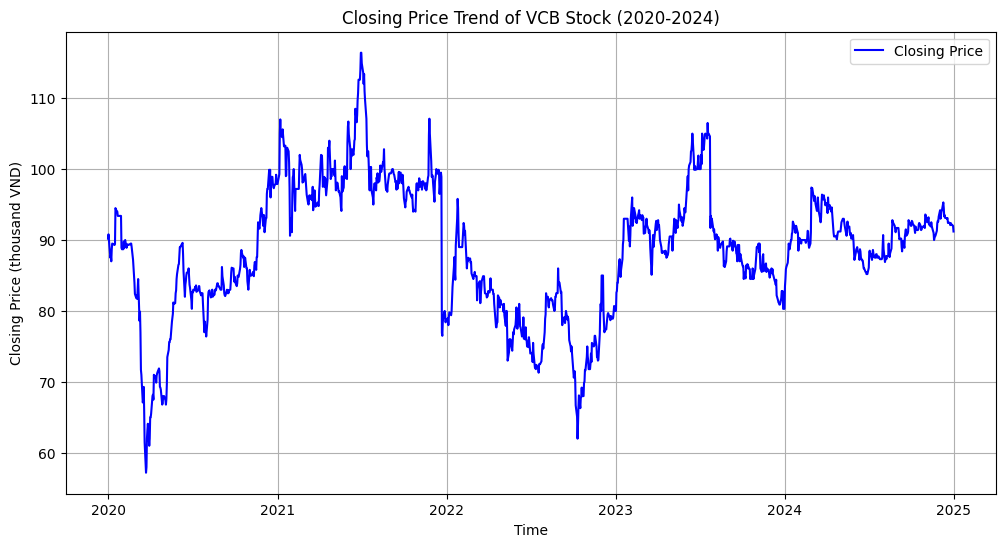

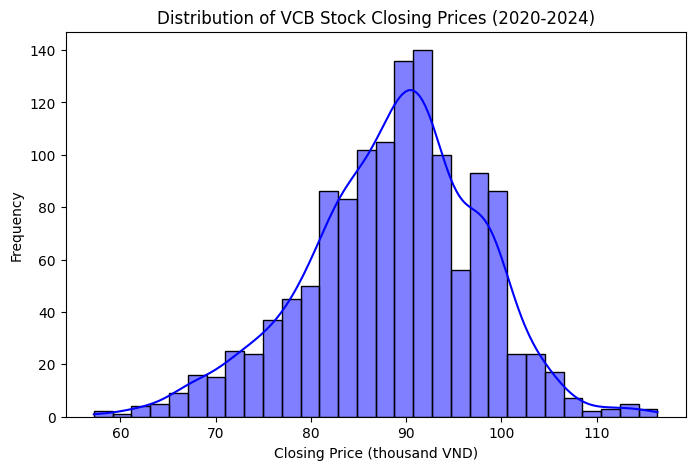

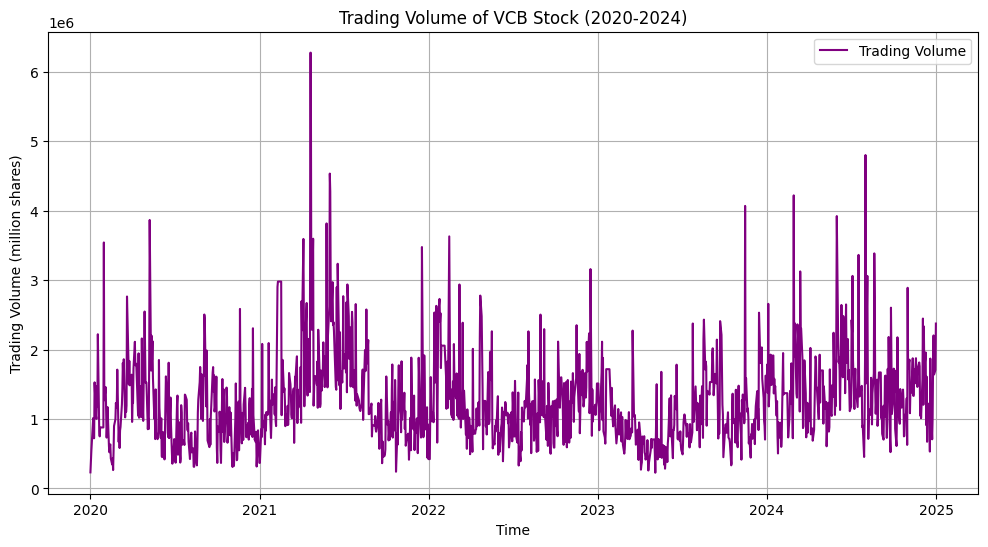

<ipython-input-1-65962512057a>:83: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




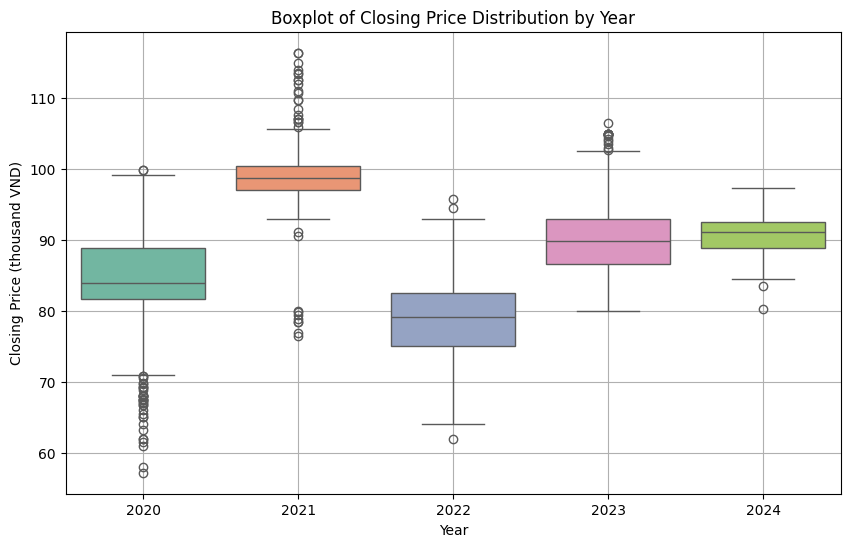

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

# Đọc dữ liệu
file_path = "/content/Stock_VCB_filled.csv"
df = pd.read_csv(file_path)

# Chuyển đổi cột 'date' sang định dạng datetime
df['date'] = pd.to_datetime(df['date'])

# Lọc dữ liệu trong khoảng thời gian từ 01/01/2020 đến 31/12/2024
df_filtered = df[(df['date'] >= "2020-01-01") & (df['date'] <= "2024-12-31")]

# Hiển thị thông tin chung về dữ liệu đã lọc
print(df_filtered.info())

# Hiển thị thống kê mô tả
print(df_filtered.describe())

# Tạo bảng thống kê mô tả, bỏ cột 'date'
summary_table = df_filtered.drop(columns=["date"]).describe().round(2)

# Chuyển DataFrame thành danh sách để vẽ bằng Plotly
header_values = [""] + list(summary_table.columns)  # Thêm cột đầu tiên để chứa các chỉ số thống kê
cell_values = [summary_table.index.tolist()] + summary_table.T.values.tolist()

# Vẽ bảng
fig = go.Figure(data=[go.Table(
    columnwidth=[150] + [200] * len(summary_table.columns),  # Tăng độ rộng cột
    header=dict(values=header_values,
                fill_color='darkblue',
                font=dict(color='white', size=14),
                align='center',
                height=35),  # Tăng độ cao hàng tiêu đề
    cells=dict(values=cell_values,
               fill_color=[['#f4f4f4', 'white'] * (len(summary_table) // 2)],
               align='center',
               font=dict(size=13),
               height=40))  # Tăng độ cao hàng nội dung
])

fig.update_layout(
    title="Thống kê mô tả dữ liệu giá cổ phiếu VCB (2020-2024)",
    title_x=0.5,
    width=1000)
fig.show()

# Plot closing price trend over time
plt.figure(figsize=(12, 6))
plt.plot(df_filtered['date'], df_filtered['close'], label='Closing Price', color='blue')
plt.xlabel("Time")
plt.ylabel("Closing Price (thousand VND)")
plt.title("Closing Price Trend of VCB Stock (2020-2024)")
plt.legend()
plt.grid()
plt.show()

# Closing price distribution
plt.figure(figsize=(8, 5))
sns.histplot(df_filtered['close'], bins=30, kde=True, color='blue')
plt.xlabel("Closing Price (thousand VND)")
plt.ylabel("Frequency")
plt.title("Distribution of VCB Stock Closing Prices (2020-2024)")
plt.show()

# Trading volume over time
plt.figure(figsize=(12, 6))
plt.plot(df_filtered['date'], df_filtered['volume_match'], label='Trading Volume', color='purple')
plt.xlabel("Time")
plt.ylabel("Trading Volume (million shares)")
plt.title("Trading Volume of VCB Stock (2020-2024)")
plt.legend()
plt.grid()
plt.show()

# Add 'year' column to group data by year
df_filtered['year'] = df_filtered['date'].dt.year

# Boxplot of closing prices by year
plt.figure(figsize=(10, 6))
sns.boxplot(x='year', y='close', data=df_filtered, palette="Set2")
plt.xlabel("Year")
plt.ylabel("Closing Price (thousand VND)")
plt.title("Boxplot of Closing Price Distribution by Year")
plt.grid()
plt.show()

# Candlestick chart
fig = go.Figure(data=[go.Candlestick(
    x=df_filtered['date'],
    open=df_filtered['open'],
    high=df_filtered['high'],
    low=df_filtered['low'],
    close=df_filtered['close'],
    increasing_line_color='green',   # Green for bullish candles
    decreasing_line_color='red'      # Red for bearish candles
)])

# Customize chart appearance
fig.update_layout(
    title="Candlestick Chart of VCB Stock (2020-2024)",
    xaxis_title="Time",
    yaxis_title="Price (thousand VND)",
    xaxis_rangeslider_visible=False,  # Hide time range slider
    template="plotly_white"
)

# Display chart
fig.show()